# Random Forest Model using sklearn

In [4]:

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# To Train our data
from xgboost import XGBClassifier
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import StandardScaler, normalize

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (
                             log_loss,
                             precision_score,
                             recall_score)
from sklearn.model_selection import LeaveOneOut


# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,RandomizedSearchCV



import sys
sys.path.append("../scripts")
from ml_pipeline import run_train_pipeline
from read_data import ReadData

In [ ]:
reader = ReadData()

In [6]:
main_df = reader.dvc_get_data(path="../data/train.csv", version="v1")
main_df

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,season,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,summer,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
1,1,1,4,2015-07-30,5020,546,1,1,0,1,...,summer,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
2,2,1,3,2015-07-29,4782,523,1,1,0,1,...,summer,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
3,3,1,2,2015-07-28,5011,560,1,1,0,1,...,summer,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
4,4,1,1,2015-07-27,6102,612,1,1,0,1,...,summer,c,a,1270.0,9,2008,0,0,0,"Nan,Nan,Nan,Nan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1115,6,2013-01-05,4771,339,1,0,0,1,...,winter,d,c,5350.0,1,1990,1,22,2012,"Mar,Jun,Sept,Dec"
1017205,1017205,1115,5,2013-01-04,4540,326,1,0,0,1,...,winter,d,c,5350.0,1,1990,1,22,2012,"Mar,Jun,Sept,Dec"
1017206,1017206,1115,4,2013-01-03,4297,300,1,0,0,1,...,winter,d,c,5350.0,1,1990,1,22,2012,"Mar,Jun,Sept,Dec"
1017207,1017207,1115,3,2013-01-02,3697,305,1,0,0,1,...,winter,d,c,5350.0,1,1990,1,22,2012,"Mar,Jun,Sept,Dec"


In [7]:
df = main_df.copy()
df = df
df.set_index('Year', inplace=True)
df.shape

(1017209, 26)

In [8]:
x = df.drop(columns=['Sales','Unnamed: 0','Customers'])
y = df['Sales']

# Using Sklearn's Pipeline to train the model and get results

In [9]:
model = RandomForestRegressor(n_estimators = 10, random_state = 42)
str(model)

'RandomForestRegressor(n_estimators=10, random_state=42)'

2022-09-10 11:43:14,102:logger:successfully got catagorical columns
2022-09-10 11:43:19,575:logger:successfully got catagorical columns
2022-09-10 11:43:19,793:logger:successfully got numerical columns
2022-09-10 11:45:19,816:logger:RMSE Score: 866.5740152106698
2022-09-10 11:45:19,838:logger:R2_Squared: 0.9490990116207806
2022-09-10 11:45:19,840:logger:MAE Score: 506.40923899686396
2022-09-10 11:45:19,899:logger:Accuracy: 90.78 %.
2022-09-10 11:45:20,387:logger:feature importance plotted


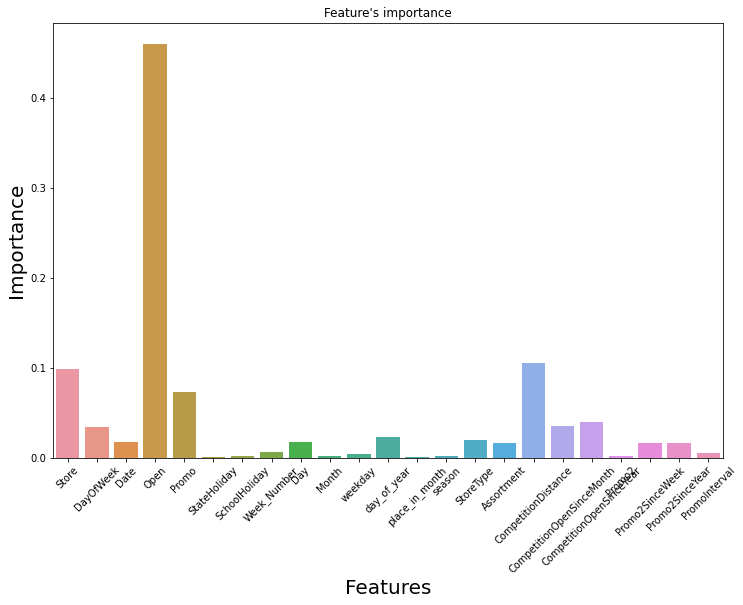

In [10]:
run_train_pipeline(model, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='sixth_run')

# Regerssion with some Tuning using sklearn pipeline

In [17]:
model = RandomForestRegressor(n_estimators=20)
random_grid = { 
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

2022-05-29 17:08:59,389:logger:successfully got catagorical columns
2022-05-29 17:08:59,391:logger:successfully got catagorical columns
2022-05-29 17:08:59,394:logger:successfully got numerical columns


Fitting 3 folds for each of 10 candidates, totalling 30 fits


2022-05-29 17:11:06,050:logger:RMSE Score: 772.1753001786682
2022-05-29 17:11:06,052:logger:R2_Squared: 0.9505878270698136
2022-05-29 17:11:06,053:logger:MAE Score: 466.30293273867863
2022-05-29 17:11:06,058:logger:Accuracy: 91.32 %.


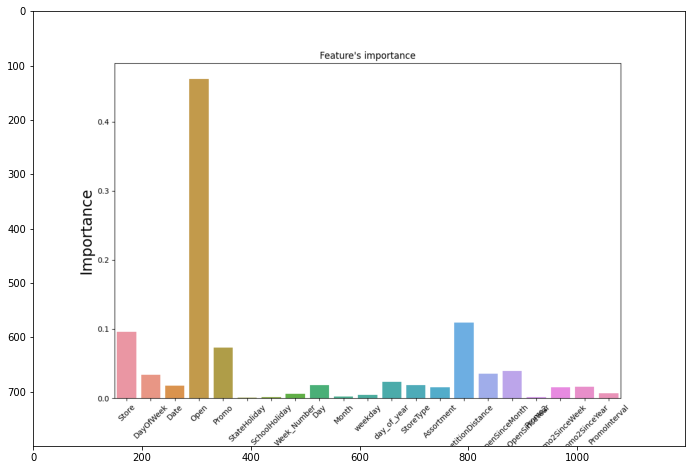

2022-05-29 17:11:06,599:logger:feature importance plotted


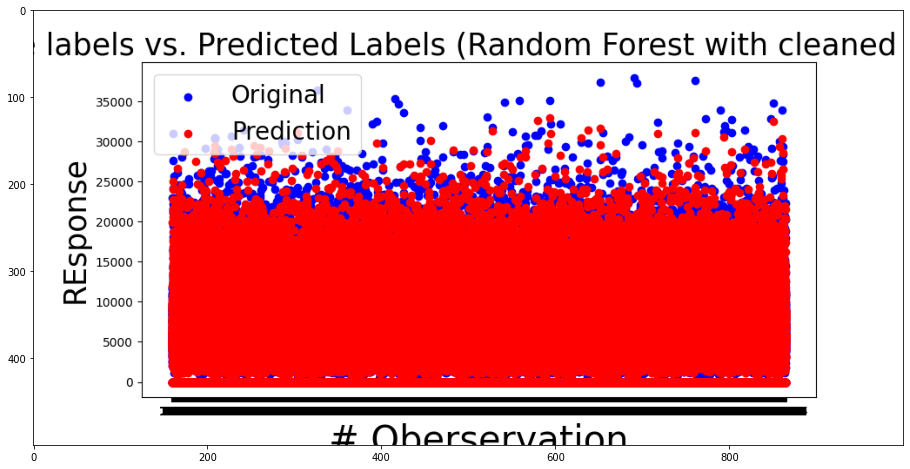

2022-05-29 17:11:06,994:logger:plotted prediction vs true labels


Successfully registered model Random Forest with cleaned data_sixth_run_Sat-May-28-19:51:43-2022
Run - fine_tuned is logged to Experiment - Random Forest with cleaned data


In [18]:
run_train_pipeline(rf_random, x, y, 
                experiment_name='Random Forest with cleaned data',
                run_name='fine_tuned')